<a href="https://colab.research.google.com/github/ericyoc/ml_portfolio/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# k nearest neighbors (KNN)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
def main():

    # load dataset using pandas
    df = pd.read_csv('ml_data/teleCust1000t.csv')
    print(df.head())

    # data visiualization and analysis

    print(df['custcat'].value_counts())

    df.hist(column='income', bins=50)

    print(df.columns)

    X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
    print(X[0:5])

    # what are the labels?
    y = df['custcat'].values
    print(y[0:5])

    # Normalize data
    X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
    print(X[0:5])

    # train / test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
    print('Train set:', X_train.shape,  y_train.shape)
    print('Test set:', X_test.shape,  y_test.shape)

    # classification
    # k nearest neighbor (KNN)
    from sklearn.neighbors import KNeighborsClassifier

    # training
    k = 4
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    print(neigh)

    # predicting
    yhat = neigh.predict(X_test)
    print(yhat[0:5])

    # accuracy evaluation
    from sklearn import metrics
    print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
    print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

    # build model with k=6
    k = 6
    neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat6 = neigh6.predict(X_test)
    print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
    print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

    # calculate the accuracy of KNN for different values of k.
    Ks = 10
    mean_acc = np.zeros((Ks-1))
    std_acc = np.zeros((Ks-1))

    for n in range(1,Ks):

        #Train Model and Predict
        neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
        yhat=neigh.predict(X_test)
        mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

        std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

    print(mean_acc)
    print(std_acc)

    # plot model accuracy for different numbers of neighbors
    plt.plot(range(1,Ks),mean_acc,'g')
    plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
    plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
    plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
    plt.ylabel('Accuracy ')
    plt.xlabel('Number of Neighbors (K)')
    plt.tight_layout()
    plt.show()

    print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)


   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  
3    281
1    266
4    236
2    217
Name: custcat, dtype: int64
Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')
[[  2.  13.  44.   1.   9.  64.   4.   5.   0.   0.   2.]
 [  3.  11.  33.   1.   7. 136.   5.   5.   0.   0.   6.]
 [  3.  68.  52.   1.  24. 116.   1.  29.   0.   1.   2.]
 [

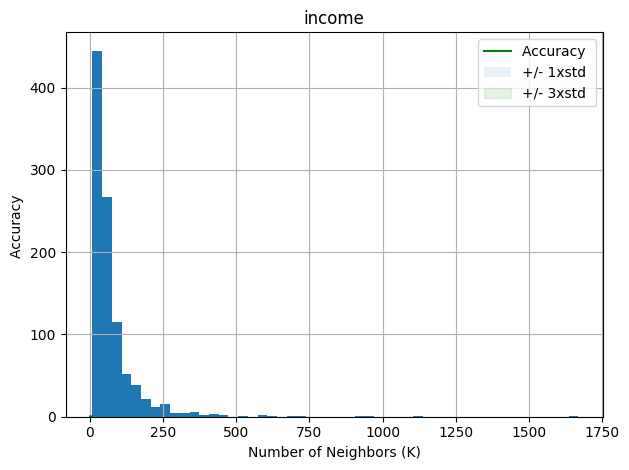

The best accuracy was with 0.34 with k= 9


In [4]:
if __name__ == "__main__":
    main()